In [2]:
#import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings 
filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
# Import machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,roc_curve, roc_auc_score,accuracy_score

In [3]:
#Read all csv files
df_train = pd.read_csv('training_data.csv')
df_test = pd.read_csv('testing_data.csv')

### Train & Test data:

In [4]:
df_train.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [5]:
df_test.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,...,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No


In [7]:
# shape of train dataset
df_train.shape

(105000, 26)

In [8]:
# shape of test dataset
df_test.shape

(45000, 25)

## Info of Both Train and Test Dataset

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         45000 non-null  int64 
 1   Date_Of_Disbursement       44892 non-null  object
 2   Business                   44994 non-null  object
 3   Jobs_Reatained             45000 non-null  int64 
 4   Jobs_Created               45000 non-null  int64 
 5   Year_Of_Commitment         45000 non-null  object
 6   Guaranteed_Approved _Loan  45000 non-null  object
 7   Borrower_Name              44998 non-null  object
 8   Low_Documentation_Loan     44867 non-null  object
 9   Demography                 45000 non-null  object
 10  State_Of_Bank              45000 non-null  object
 11  ChargedOff_Amount          45000 non-null  object
 12  Borrower_City              45000 non-null  object
 13  Borrower_State             44951 non-null  object
 14  Gross_

### Statistical Description of Train and Test Dataset

In [11]:
df_train.describe()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
count,105000.00000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000
mean,52499.50000,12.688648,10.379248,9.904248,405918.304276,156.438362,4.661622e+09,2707.201638,0.277181
std,30311.03347,270.544185,270.340849,58.157056,260335.963766,116.412721,2.546599e+09,12660.609090,0.447609
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000034e+09,0.000000,0.000000
25%,26249.75000,0.000000,0.000000,2.000000,236115.000000,90.000000,2.478163e+09,0.000000,0.000000
50%,52499.50000,1.000000,0.000000,4.000000,447110.000000,126.000000,4.119824e+09,1.000000,0.000000
75%,78749.25000,4.000000,1.000000,9.000000,561740.000000,180.000000,6.760484e+09,1.000000,1.000000
max,104999.00000,8800.000000,8800.000000,7200.000000,928120.000000,692.000000,9.996003e+09,92006.000000,1.000000


In [12]:
df_test.describe()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000
mean,127499.500000,11.420244,8.985000,10.328933,406331.106844,155.859733,4.650410e+09,2778.932422
std,12990.525394,249.032938,248.938817,97.484008,259459.201130,116.211145,2.537430e+09,12843.722921
min,105000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000534e+09,0.000000
25%,116249.750000,0.000000,0.000000,2.000000,236115.000000,88.000000,2.486456e+09,0.000000
50%,127499.500000,1.000000,0.000000,4.000000,447110.000000,126.000000,4.098569e+09,1.000000
75%,138749.250000,4.000000,1.000000,9.000000,561790.000000,180.000000,6.720642e+09,1.000000
max,149999.000000,8800.000000,8800.000000,8999.000000,928120.000000,758.000000,9.995473e+09,91350.000000


In [13]:
#five point summary of Categorical features of merged train dataset
df_train.describe(include = ['object']).T

,count,unique,top,freq
Date_Of_Disbursement,104765,3505,31-Jul-95,1111
Business,104985,3,Existing,75091
Year_Of_Commitment,105000,91,2007,6769
Guaranteed_Approved _Loan,105000,10138,Rs.2032000.0,6464
Borrower_Name,104997,101068,SUBWAY,147
Low_Documentation_Loan,104633,7,No,92135
Demography,105000,3,Urban,57598
State_Of_Bank,105000,34,TR,15552
ChargedOff_Amount,105000,23059,Rs.0.0,75515
Borrower_City,105000,1193,Jhansi,1504


### Checking for duplicate records in the Train dataset

In [14]:
#check for duplicate
dups = df_train.duplicated()
print('Number of duplicate row = %d' %(dups.sum()))

Number of duplicate row = 0


In [15]:
df_train_num = df_train.select_dtypes(['float64','int64'])
df_train_cat = df_train.select_dtypes(['object'])

In [16]:
df_train_num.isnull().sum()

ID                      0
Jobs_Reatained          0
Jobs_Created            0
Count_Employees         0
Classification_Code     0
Loan_Term               0
Primary_Loan_Digit      0
Code_Franchise          0
Default                 0
dtype: int64

In [17]:
df_train_cat.isnull().sum()

Date_Of_Disbursement         235
Business                      15
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Borrower_Name                  3
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Borrower_State                 0
Gross_Amount_Balance           0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Commitment_Date                0
Name_Of_Bank                   0
Revolving_Credit_Line        491
dtype: int64

In [18]:
df_train_cat = df_train_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [19]:
df_train_cat.isnull().sum()

Date_Of_Disbursement         0
Business                     0
Year_Of_Commitment           0
Guaranteed_Approved _Loan    0
Borrower_Name                0
Low_Documentation_Loan       0
Demography                   0
State_Of_Bank                0
ChargedOff_Amount            0
Borrower_City                0
Borrower_State               0
Gross_Amount_Balance         0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Commitment_Date              0
Name_Of_Bank                 0
Revolving_Credit_Line        0
dtype: int64

In [21]:
df_train_cat.head()

,Date_Of_Disbursement,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed,Commitment_Date,Name_Of_Bank,Revolving_Credit_Line
0,31-Jul-91,Existing,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,AP,Rs.0.0,Mumbai,Maharashtra,Rs.0.0,Rs.40640000.0,Rs.40640000.0,2-Apr-91,Axis Bank Ltd.,No
1,30-Apr-06,New,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,TR,Rs.38283367.68,Delhi,Delhi,Rs.0.0,Rs.43647360.0,Rs.43647360.0,10-Apr-06,Bandhan Bank Ltd.,0
2,30-Jun-04,Existing,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,AS,Rs.0.0,Bengaluru,Karnataka,Rs.0.0,Rs.2844800.0,Rs.5961400.32,25-May-04,CSB Bank Limited,Yes
3,31-Jan-06,New,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,BR,Rs.0.0,Ahmedabad,Gujarat,Rs.0.0,Rs.4064000.0,Rs.4064000.0,21-Dec-05,City Union Bank Ltd.,Yes
4,31-Dec-04,Existing,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,TR,Rs.22862519.68,Hyderabad,Telangana,Rs.0.0,Rs.30642560.0,Rs.30642560.0,2-Nov-04,DCB Bank Ltd.,0


In [22]:
df_train_num.head()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
0,0,0,0,38,0,126,4419763001,1,0
1,1,0,6,6,451120,123,1709796003,1,1
2,2,4,0,4,541618,90,7464754008,1,0
3,3,9,1,7,811112,126,1588745006,0,0
4,4,4,0,4,722211,104,8037734002,1,1


In [23]:
for feature in df_train.columns:
    if df_train[feature].dtype == 'object':
        print(feature)
        print(df_train[feature].value_counts())
        print('\n')    

Date_Of_Disbursement
31-Jul-95    1111
30-Apr-95    1077
31-Jan-95    1064
31-Oct-94     946
31-Mar-06     922
             ... 
13-Dec-94       1
11-Feb-80       1
23-May-12       1
14-Jan-81       1
2-May-80        1
Name: Date_Of_Disbursement, Length: 3505, dtype: int64


Business
Existing    75091
New         29789
0             105
Name: Business, dtype: int64


Year_Of_Commitment 
2007    6769
2006    6755
2005    6705
2004    5440
2003    4501
        ... 
1972       2
1975       2
1971       2
1969       1
1976       1
Name: Year_Of_Commitment , Length: 91, dtype: int64


Guaranteed_Approved _Loan
Rs.2032000.0     6464
Rs.1016000.0     5179
Rs.406400.0      3820
Rs.4064000.0     3192
Rs.1422400.0     2153
                 ... 
Rs.5257596.8        1
Rs.16026384.0       1
Rs.403148.8         1
Rs.40388844.8       1
Rs.59765184.0       1
Name: Guaranteed_Approved _Loan, Length: 10138, dtype: int64


Borrower_Name 
SUBWAY                            147
QUIZNO'S SUBS                

In [24]:
df_train.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Default'],
      dtype='object')

### Test dataset

In [25]:
df_test.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,...,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No


In [26]:
df_test.tail()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
44995,149995,30-Nov-05,Existing,3,1,2005,Rs.1625600.0,ULTIMATE COMPUTERS,No,Urban,...,3,423690,Rs.3251200.0,Rs.2291852.16,81,29-Sep-05,9135674006,1,Saurashtra Gramin Bank,Yes
44996,149996,31-Jul-02,Existing,12,0,2002,Rs.29657040.0,"MARK A. HENKE, D>M.D., P.C.",No,Urban,...,12,621210,Rs.39542720.0,Rs.36292170.24,180,27-Jun-02,5494234007,1,Uttarbanga Kshetriya Gramin Bank,NaN
44997,149997,13-Aug-08,Existing,0,15,2008,Rs.60878720.0,"ARTHUR J DEBAISE M.D., P.A.",No,Urban,...,4,621111,Rs.60878720.0,Rs.60878720.0,360,15-Apr-08,3225006003,1,Aryavart Bank,NaN
44998,149998,28-Feb-03,Existing,2,0,2003,Rs.2032000.0,CHO & SONS CORP,No,Urban,...,2,445120,Rs.4064000.0,Rs.4064000.0,90,24-Jan-03,6047584010,1,Au Small Finance Bank Ltd.,NaN
44999,149999,1-Apr-10,Existing,0,2,2008,Rs.1016000.0,"Hanft Family Chiropractic, Inc",No,Rural,...,1,621310,Rs.2032000.0,Rs.2233249.2800000003,94,7-Jul-08,3148675004,0,Shinhan Bank,NaN


In [27]:
#shape of test dataset
df_test.shape

(45000, 25)

In [28]:
#info of test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         45000 non-null  int64 
 1   Date_Of_Disbursement       44892 non-null  object
 2   Business                   44994 non-null  object
 3   Jobs_Reatained             45000 non-null  int64 
 4   Jobs_Created               45000 non-null  int64 
 5   Year_Of_Commitment         45000 non-null  object
 6   Guaranteed_Approved _Loan  45000 non-null  object
 7   Borrower_Name              44998 non-null  object
 8   Low_Documentation_Loan     44867 non-null  object
 9   Demography                 45000 non-null  object
 10  State_Of_Bank              45000 non-null  object
 11  ChargedOff_Amount          45000 non-null  object
 12  Borrower_City              45000 non-null  object
 13  Borrower_State             44951 non-null  object
 14  Gross_

In [29]:

#five point summary of numerical features of test dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,45000.0,1.274995e+05,1.299053e+04,1.050000e+05,1.162498e+05,1.274995e+05,1.387492e+05,1.499990e+05
Jobs_Reatained,45000.0,1.142024e+01,2.490329e+02,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,8.800000e+03
Jobs_Created,45000.0,8.985000e+00,2.489388e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,8.800000e+03
Count_Employees,45000.0,1.032893e+01,9.748401e+01,0.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,8.999000e+03
Classification_Code,45000.0,4.063311e+05,2.594592e+05,0.000000e+00,2.361150e+05,4.471100e+05,5.617900e+05,9.281200e+05
Loan_Term,45000.0,1.558597e+02,1.162111e+02,0.000000e+00,8.800000e+01,1.260000e+02,1.800000e+02,7.580000e+02
Primary_Loan_Digit,45000.0,4.650410e+09,2.537430e+09,1.000534e+09,2.486456e+09,4.098569e+09,6.720642e+09,9.995473e+09
Code_Franchise,45000.0,2.778932e+03,1.284372e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,9.135000e+04


In [30]:

#five point summary of Categorical features of test dataset
df_test.describe(include = ['object']).T

,count,unique,top,freq
Date_Of_Disbursement,44892,2139,30-Apr-95,463
Business,44994,3,Existing,32062
Year_Of_Commitment,45000,44,2007,4275
Guaranteed_Approved _Loan,45000,6151,Rs.2032000.0,2768
Borrower_Name,44998,43902,SUBWAY,65
Low_Documentation_Loan,44867,7,No,39476
Demography,45000,3,Urban,24586
State_Of_Bank,45000,34,TR,6603
ChargedOff_Amount,45000,10833,Rs.0.0,32310
Borrower_City,45000,1242,Jhansi,638


### Checking for duplicate records in the Test dataset

In [31]:
#check for duplicate
dups = df_test.duplicated()
print('Number of duplicate row = %d' %(dups.sum()))

Number of duplicate row = 0


In [32]:
df_test_num = df_test.select_dtypes(['float64','int64'])
df_test_cat = df_test.select_dtypes(['object'])

In [33]:
df_test_num.isnull().sum()

ID                      0
Jobs_Reatained          0
Jobs_Created            0
Count_Employees         0
Classification_Code     0
Loan_Term               0
Primary_Loan_Digit      0
Code_Franchise          0
dtype: int64

In [34]:
df_test_cat.isnull().sum()

Date_Of_Disbursement           108
Business                         6
Year_Of_Commitment               0
Guaranteed_Approved _Loan        0
Borrower_Name                    2
Low_Documentation_Loan         133
Demography                       0
State_Of_Bank                    0
ChargedOff_Amount                0
Borrower_City                    0
Borrower_State                  49
Gross_Amount_Balance             0
Loan_Approved_Gross              0
Gross_Amount_Disbursed           0
Commitment_Date                  0
Name_Of_Bank                     0
Revolving_Credit_Line        13825
dtype: int64

In [35]:
df_test_cat = df_test_cat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [36]:
df_test_cat.isnull().sum()

Date_Of_Disbursement         0
Business                     0
Year_Of_Commitment           0
Guaranteed_Approved _Loan    0
Borrower_Name                0
Low_Documentation_Loan       0
Demography                   0
State_Of_Bank                0
ChargedOff_Amount            0
Borrower_City                0
Borrower_State               0
Gross_Amount_Balance         0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Commitment_Date              0
Name_Of_Bank                 0
Revolving_Credit_Line        0
dtype: int64

In [37]:
df_test_cat.head()

,Date_Of_Disbursement,Business,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,State_Of_Bank,ChargedOff_Amount,Borrower_City,Borrower_State,Gross_Amount_Balance,Loan_Approved_Gross,Gross_Amount_Disbursed,Commitment_Date,Name_Of_Bank,Revolving_Credit_Line
0,31-Mar-06,Existing,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,GJ,Rs.8050784.0,Safidon,Haryana,Rs.0.0,Rs.8128000.0,Rs.9403852.16,9-Mar-06,ICICI Bank Ltd.,Yes
1,31-Jan-95,Existing,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,AS,Rs.0.0,Nanjikottai,Tamil Nadu,Rs.0.0,Rs.1625600.0,Rs.1625600.0,14-Dec-94,South Indian Bank Ltd.,No
2,30-Sep-06,Existing,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,ML,Rs.1625600.0,Tonk,Rajasthan,Rs.0.0,Rs.1625600.0,Rs.3450336.0,25-Aug-06,IDBI Bank Limited,Yes
3,31-Jul-00,New,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,TR,Rs.0.0,Musabani,Jharkhand,Rs.0.0,Rs.4064000.0,Rs.6916196.48,28-Jun-00,Aryavart Bank,Yes
4,30-Jun-05,Existing,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,TR,Rs.0.0,Adityapur,Jharkhand,Rs.0.0,Rs.31292800.0,Rs.31292800.0,2-May-05,Paschim Banga Gramin Bank,No


In [38]:
df_test.shape

(45000, 25)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         45000 non-null  int64 
 1   Date_Of_Disbursement       44892 non-null  object
 2   Business                   44994 non-null  object
 3   Jobs_Reatained             45000 non-null  int64 
 4   Jobs_Created               45000 non-null  int64 
 5   Year_Of_Commitment         45000 non-null  object
 6   Guaranteed_Approved _Loan  45000 non-null  object
 7   Borrower_Name              44998 non-null  object
 8   Low_Documentation_Loan     44867 non-null  object
 9   Demography                 45000 non-null  object
 10  State_Of_Bank              45000 non-null  object
 11  ChargedOff_Amount          45000 non-null  object
 12  Borrower_City              45000 non-null  object
 13  Borrower_State             44951 non-null  object
 14  Gross_

In [40]:
for feature in df_test.columns:
    if df_test[feature].dtype == 'object':
        print(feature)
        print(df_test[feature].value_counts())
        print('\n') 

Date_Of_Disbursement
30-Apr-95    463
31-Jul-95    456
31-Mar-06    398
31-Oct-94    398
31-Aug-07    397
            ... 
27-Aug-97      1
28-Mar-02      1
28-Apr-00      1
5-May-82       1
9-Aug-02       1
Name: Date_Of_Disbursement, Length: 2139, dtype: int64


Business
Existing    32062
New         12878
0              54
Name: Business, dtype: int64


Year_Of_Commitment 
2007     4275
2006     4188
2005     4082
2004     3429
2003     2789
2008     2350
2002     2138
1995     1994
1999     1854
2001     1820
1996     1800
2000     1750
1997     1746
1998     1734
1994     1392
1993     1038
1992      967
2009      927
2010      832
1990      680
1991      679
2011      618
1989      605
2012      276
1986      152
1987      130
1984      122
1988      114
2013      112
1985      107
1983      101
1982       46
1981       35
1979       29
1980       28
1978       22
2014       16
1977        9
1976A       5
1974        3
1973        3
1971        1
1976        1
1966        1
Name:

In [41]:
df_test.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line'],
      dtype='object')

### Univariate Analysis on Numerical variables

In [42]:
df_train_num = df_train.select_dtypes(include = ['int64','float64'])
listnumericcolumns = list(df_train_num.columns.values)
len(listnumericcolumns)

9

In [43]:
def univariateAnalysis_numeric (column, nbins):
    print('Description of '+ column)
    print('---------------------------------------')
    print(df_train_num[column].describe(), end = '')
    print('\n-------------------------------------')
    
    plt.figure()
    print('Distribution of '+ column)
    print('---------------------------------------')
    sns.distplot(df_train_num[column], kde = True, color = 'g')
    plt.show()
    
    plt.figure()
    print('BoxPlot of' + column)
    print('-----------------------------------------')
    sns.boxplot(df_train_num[column])
    plt.show()

Description of ID
---------------------------------------
count    105000.00000
mean      52499.50000
std       30311.03347
min           0.00000
25%       26249.75000
50%       52499.50000
75%       78749.25000
max      104999.00000
Name: ID, dtype: float64
-------------------------------------
Distribution of ID
---------------------------------------


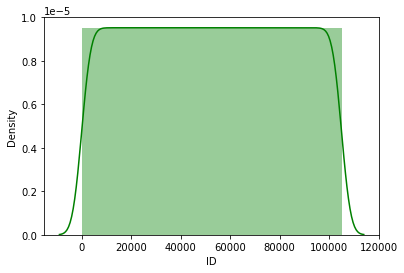

BoxPlot ofID
-----------------------------------------


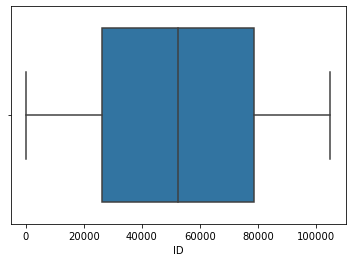

Description of Jobs_Reatained
---------------------------------------
count    105000.000000
mean         12.688648
std         270.544185
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        8800.000000
Name: Jobs_Reatained, dtype: float64
-------------------------------------
Distribution of Jobs_Reatained
---------------------------------------


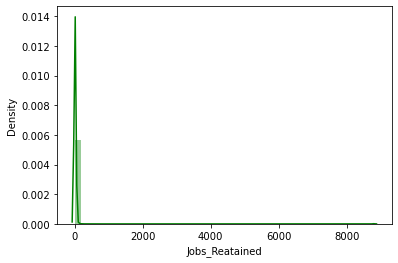

BoxPlot ofJobs_Reatained
-----------------------------------------


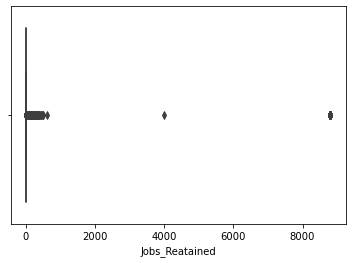

Description of Jobs_Created 
---------------------------------------
count    105000.000000
mean         10.379248
std         270.340849
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        8800.000000
Name: Jobs_Created , dtype: float64
-------------------------------------
Distribution of Jobs_Created 
---------------------------------------


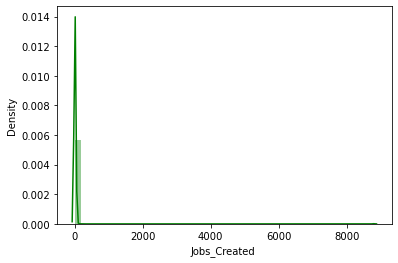

BoxPlot ofJobs_Created 
-----------------------------------------


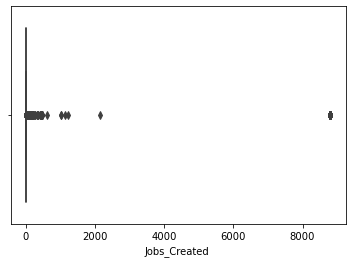

Description of Count_Employees
---------------------------------------
count    105000.000000
mean          9.904248
std          58.157056
min           0.000000
25%           2.000000
50%           4.000000
75%           9.000000
max        7200.000000
Name: Count_Employees, dtype: float64
-------------------------------------
Distribution of Count_Employees
---------------------------------------


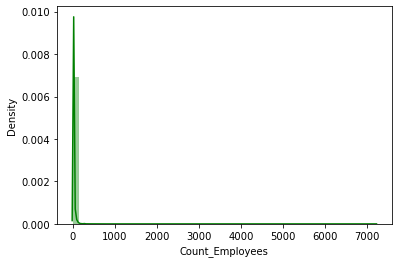

BoxPlot ofCount_Employees
-----------------------------------------


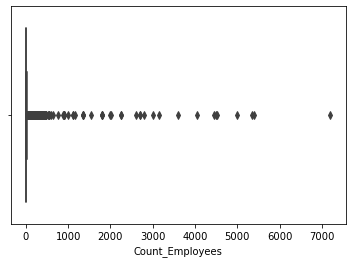

Description of Classification_Code 
---------------------------------------
count    105000.000000
mean     405918.304276
std      260335.963766
min           0.000000
25%      236115.000000
50%      447110.000000
75%      561740.000000
max      928120.000000
Name: Classification_Code , dtype: float64
-------------------------------------
Distribution of Classification_Code 
---------------------------------------


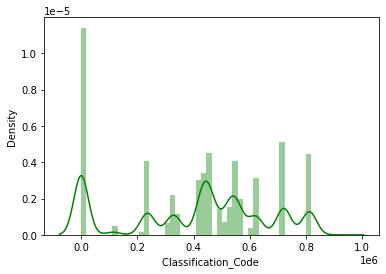

BoxPlot ofClassification_Code 
-----------------------------------------


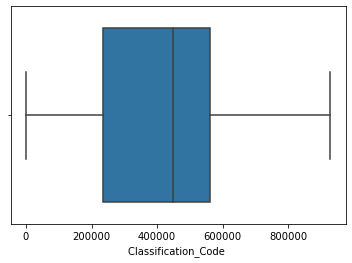

Description of Loan_Term
---------------------------------------
count    105000.000000
mean        156.438362
std         116.412721
min           0.000000
25%          90.000000
50%         126.000000
75%         180.000000
max         692.000000
Name: Loan_Term, dtype: float64
-------------------------------------
Distribution of Loan_Term
---------------------------------------


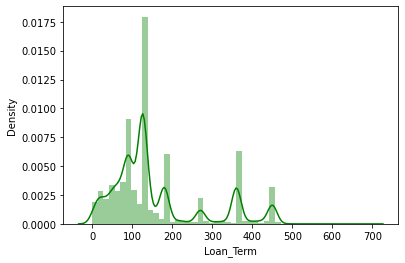

BoxPlot ofLoan_Term
-----------------------------------------


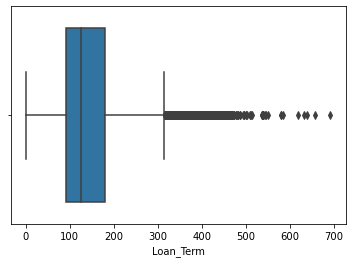

Description of Primary_Loan_Digit
---------------------------------------
count    1.050000e+05
mean     4.661622e+09
std      2.546599e+09
min      1.000034e+09
25%      2.478163e+09
50%      4.119824e+09
75%      6.760484e+09
max      9.996003e+09
Name: Primary_Loan_Digit, dtype: float64
-------------------------------------
Distribution of Primary_Loan_Digit
---------------------------------------


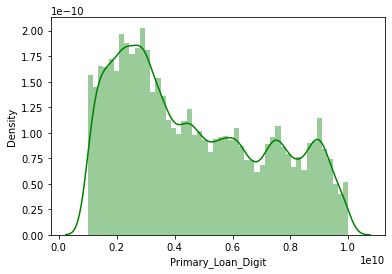

BoxPlot ofPrimary_Loan_Digit
-----------------------------------------


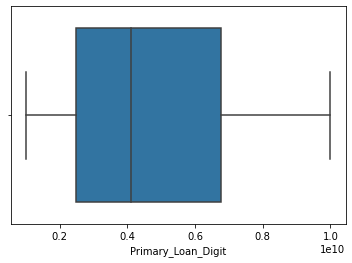

Description of Code_Franchise
---------------------------------------
count    105000.000000
mean       2707.201638
std       12660.609090
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max       92006.000000
Name: Code_Franchise, dtype: float64
-------------------------------------
Distribution of Code_Franchise
---------------------------------------


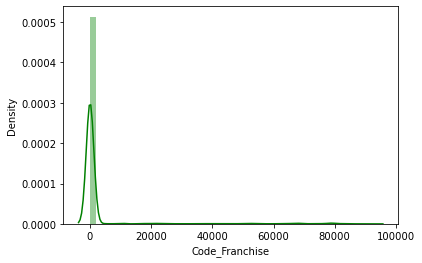

BoxPlot ofCode_Franchise
-----------------------------------------


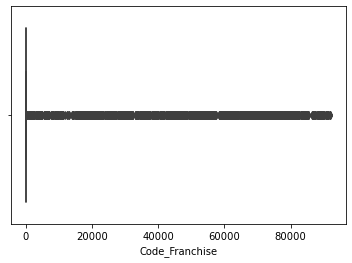

Description of Default
---------------------------------------
count    105000.000000
mean          0.277181
std           0.447609
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Default, dtype: float64
-------------------------------------
Distribution of Default
---------------------------------------


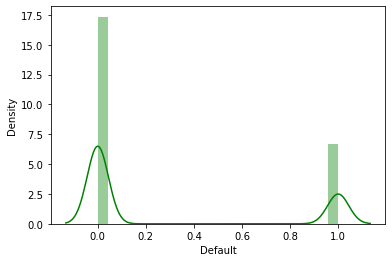

BoxPlot ofDefault
-----------------------------------------


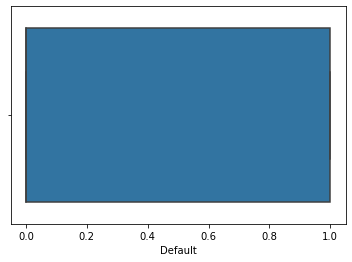

In [44]:
for x in listnumericcolumns:
    univariateAnalysis_numeric(x, 30)

In [45]:
df_train.columns

Index(['ID', 'Date_Of_Disbursement', 'Business', 'Jobs_Reatained',
       'Jobs_Created ', 'Year_Of_Commitment ', 'Guaranteed_Approved _Loan',
       'Borrower_Name ', 'Low_Documentation_Loan', 'Demography',
       'State_Of_Bank', 'ChargedOff_Amount ', 'Borrower_City',
       'Borrower_State', 'Gross_Amount_Balance', 'Count_Employees',
       'Classification_Code ', 'Loan_Approved_Gross',
       'Gross_Amount_Disbursed  ', 'Loan_Term', 'Commitment_Date',
       'Primary_Loan_Digit', 'Code_Franchise', 'Name_Of_Bank',
       'Revolving_Credit_Line', 'Default'],
      dtype='object')

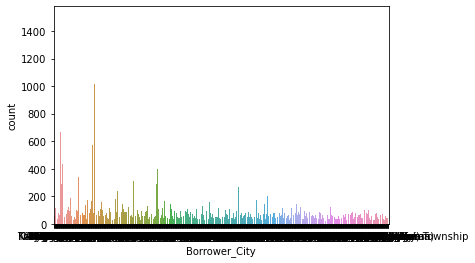

In [46]:
sns.countplot('Borrower_City', data = df_train);

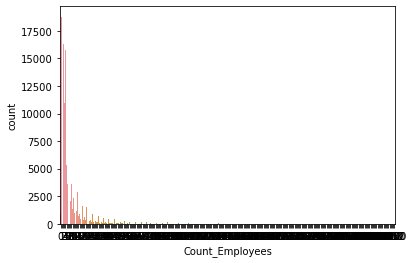

In [47]:
sns.countplot('Count_Employees', data = df_train);

## Checking for Correlation of train_dataset:

In [48]:
corr_train = df_train.corr()
round(corr_train,3)

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
ID,1.000,-0.003,-0.003,-0.000,-0.006,-0.001,-0.003,-0.003,-0.000
Jobs_Reatained,-0.003,1.000,0.997,0.013,-0.045,0.020,-0.025,0.000,0.014
Jobs_Created,-0.003,0.997,1.000,0.010,-0.047,0.022,-0.024,0.002,0.014
Count_Employees,-0.000,0.013,0.010,1.000,-0.043,0.058,0.013,0.009,-0.035
Classification_Code,-0.006,-0.045,-0.047,-0.043,1.000,-0.128,-0.063,0.030,0.127
Loan_Term,-0.001,0.020,0.022,0.058,-0.128,1.000,0.117,0.032,-0.376
Primary_Loan_Digit,-0.003,-0.025,-0.024,0.013,-0.063,0.117,1.000,0.054,-0.201
Code_Franchise,-0.003,0.000,0.002,0.009,0.030,0.032,0.054,1.000,-0.019
Default,-0.000,0.014,0.014,-0.035,0.127,-0.376,-0.201,-0.019,1.000


### CORRELATION HEATMAP :

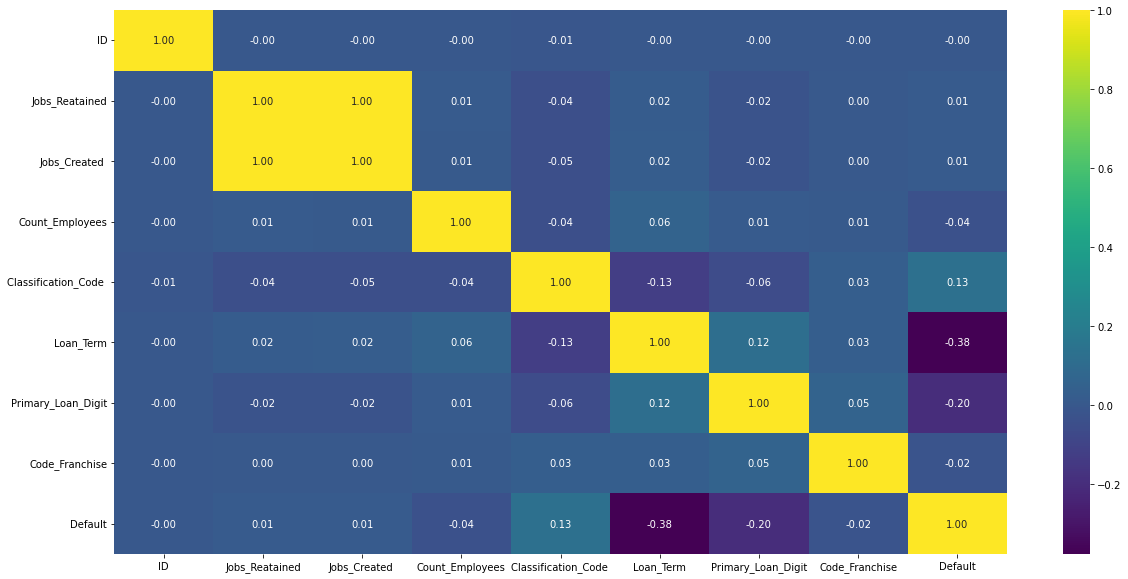

In [49]:
#creating a heatmap for better visualization
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

In [50]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df_train.columns: 
    if df_train[feature].dtype == 'object':
        df_train[feature] = pd.Categorical(df_train[feature]).codes 

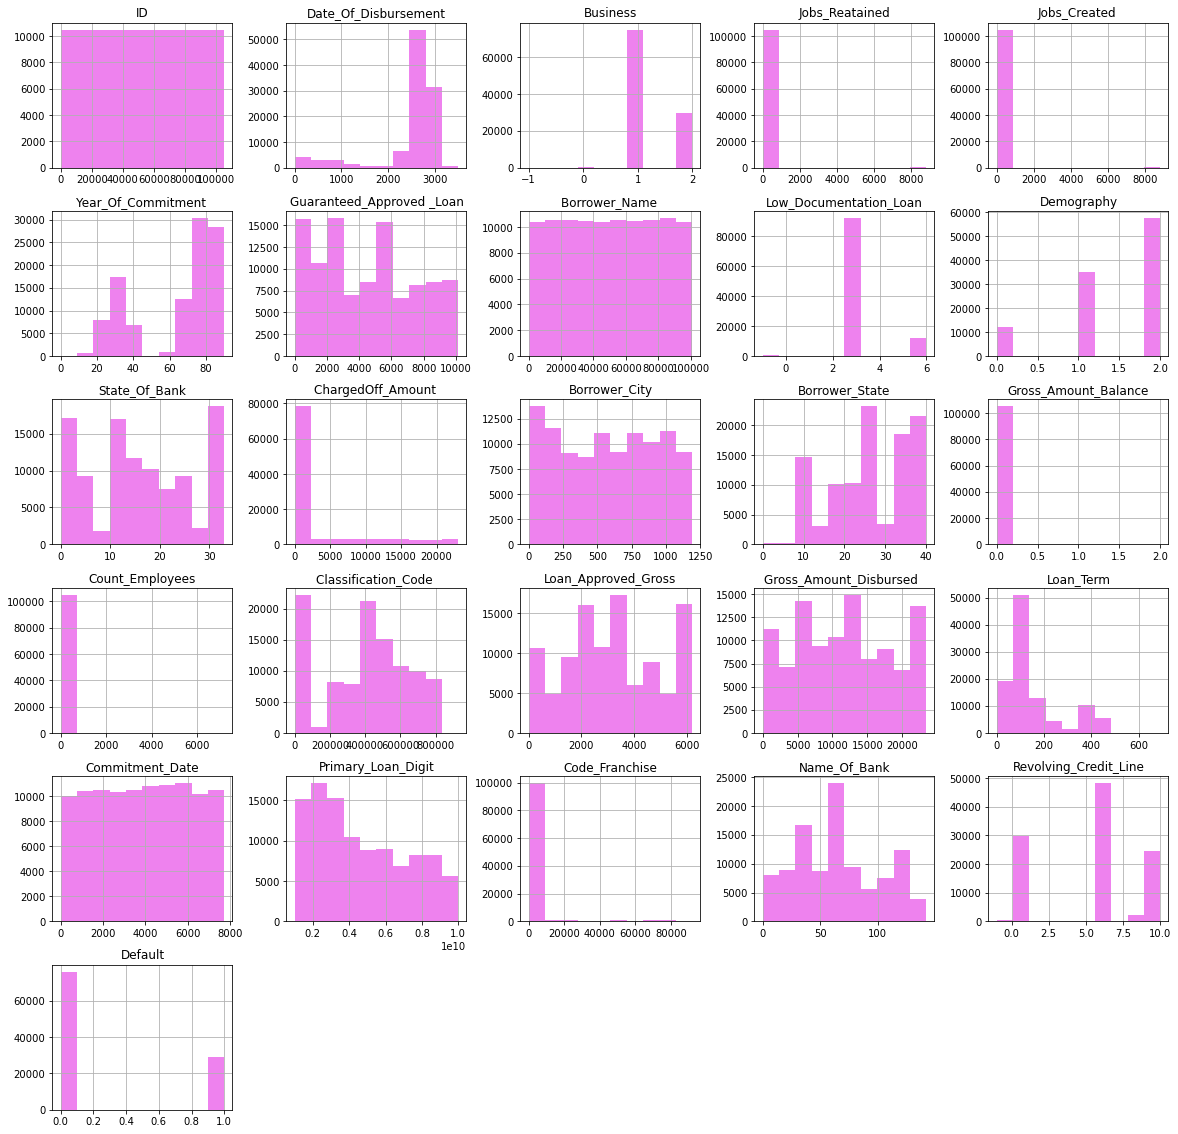

In [51]:
df_train.hist(figsize=(20,20),color='violet');

## SKEWNESS VALUE:

In [52]:
# Let's check the skewness values quantitativel y
df_train.skew().sort_values(ascending=False).round(2)

Gross_Amount_Balance         260.84
Count_Employees               68.08
Jobs_Created                  32.41
Jobs_Reatained                32.34
Code_Franchise                 5.03
Low_Documentation_Loan         1.80
ChargedOff_Amount              1.80
Loan_Term                      1.21
Default                        1.00
Business                       0.91
Primary_Loan_Digit             0.43
Name_Of_Bank                   0.36
Guaranteed_Approved _Loan      0.16
State_Of_Bank                  0.11
Gross_Amount_Disbursed         0.04
Loan_Approved_Gross            0.02
Borrower_City                  0.01
ID                             0.00
Borrower_Name                 -0.00
Commitment_Date               -0.02
Classification_Code           -0.30
Borrower_State                -0.32
Revolving_Credit_Line         -0.42
Year_Of_Commitment            -0.74
Demography                    -0.81
Date_Of_Disbursement          -2.38
dtype: float64

In [53]:
# making copies of dataset
df_train_1 = df_train.copy()
df_train_2 = df_train.copy()

In [54]:
df_train_1.Default.value_counts(normalize="True")

0    0.722819
1    0.277181
Name: Default, dtype: float64

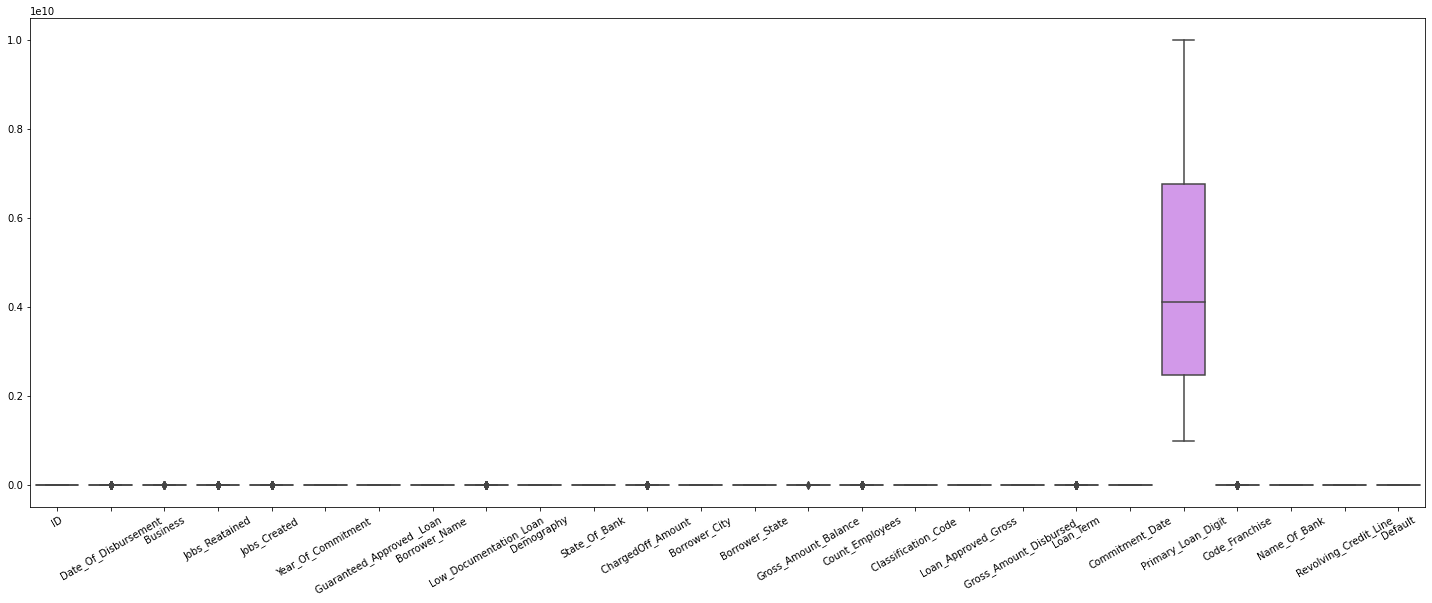

In [55]:
plt.figure(figsize=[25,9]);
sns.boxplot(data=df_train_1);
plt.xticks(rotation=30);
plt.savefig('box.jpg', bbox_inches='tight');

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   ID                         105000 non-null  int64
 1   Date_Of_Disbursement       105000 non-null  int16
 2   Business                   105000 non-null  int8 
 3   Jobs_Reatained             105000 non-null  int64
 4   Jobs_Created               105000 non-null  int64
 5   Year_Of_Commitment         105000 non-null  int8 
 6   Guaranteed_Approved _Loan  105000 non-null  int16
 7   Borrower_Name              105000 non-null  int32
 8   Low_Documentation_Loan     105000 non-null  int8 
 9   Demography                 105000 non-null  int8 
 10  State_Of_Bank              105000 non-null  int8 
 11  ChargedOff_Amount          105000 non-null  int16
 12  Borrower_City              105000 non-null  int16
 13  Borrower_State             105000 non-null  int8 
 14  Gros

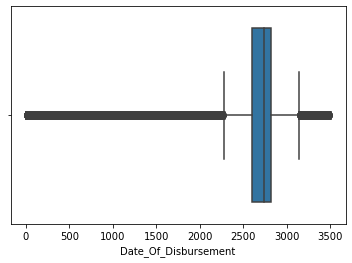

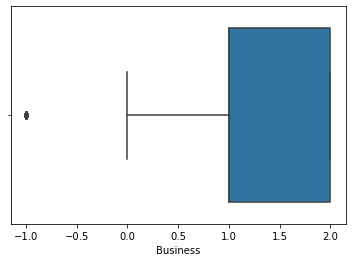

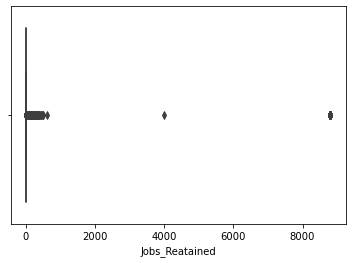

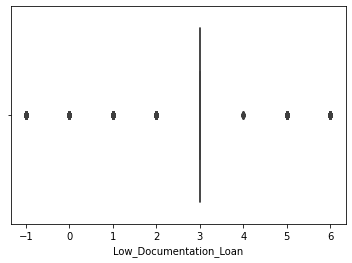

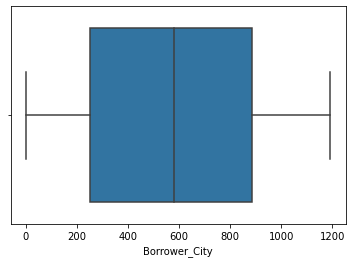

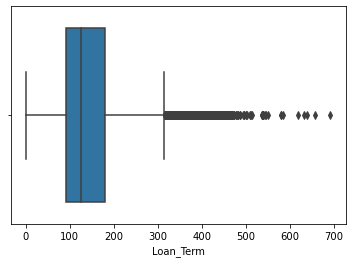

In [57]:
cols = ['Date_Of_Disbursement','Business','Jobs_Reatained','Low_Documentation_Loan','Borrower_City','Loan_Term']
for i in cols:
    sns.boxplot(df_train_1[i],whis=1.5)
    plt.show();

In [58]:
### Outlier treatment :
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [59]:
for column in df_train_1[cols].columns:
    lr,ur=remove_outlier(df_train_1[column])
    df_train_1[column]=np.where(df_train_1[column]>ur,ur,df_train_1[column])
    df_train_1[column]=np.where(df_train_1[column]<lr,lr,df_train_1[column])

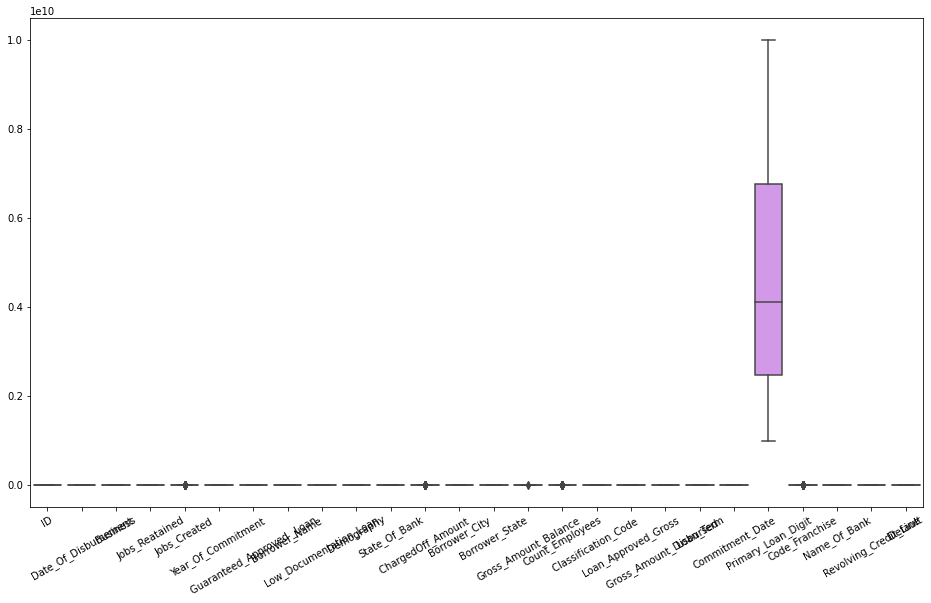

In [60]:
plt.figure(figsize=[16,9]);
sns.boxplot(data=df_train_1);
plt.xticks(rotation=30);
plt.savefig('box.jpg', bbox_inches='tight');

### Checking missing values:

In [61]:
df_train_1.isnull().sum()

ID                           0
Date_Of_Disbursement         0
Business                     0
Jobs_Reatained               0
Jobs_Created                 0
Year_Of_Commitment           0
Guaranteed_Approved _Loan    0
Borrower_Name                0
Low_Documentation_Loan       0
Demography                   0
State_Of_Bank                0
ChargedOff_Amount            0
Borrower_City                0
Borrower_State               0
Gross_Amount_Balance         0
Count_Employees              0
Classification_Code          0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Commitment_Date              0
Primary_Loan_Digit           0
Code_Franchise               0
Name_Of_Bank                 0
Revolving_Credit_Line        0
Default                      0
dtype: int64

<Figure size 72x144 with 0 Axes>

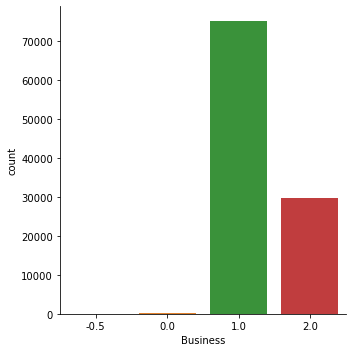

In [62]:
plt.figure(figsize=(1,2))
sns.catplot('Business', kind='count', data=df_train_1)

<Figure size 288x432 with 0 Axes>

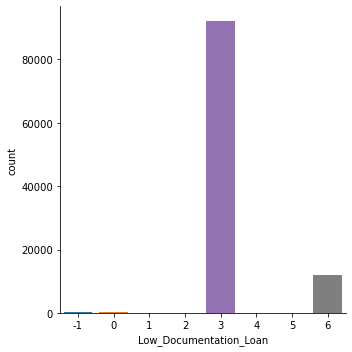

In [63]:
plt.figure(figsize=(4,6))
sns.catplot('Low_Documentation_Loan', kind='count', data=df_train)

<AxesSubplot:xlabel='Guaranteed_Approved _Loan', ylabel='Density'>

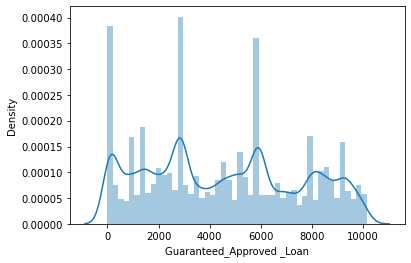

In [64]:
sns.distplot(df_train_1['Guaranteed_Approved _Loan'])

<AxesSubplot:xlabel='Loan_Approved_Gross', ylabel='Density'>

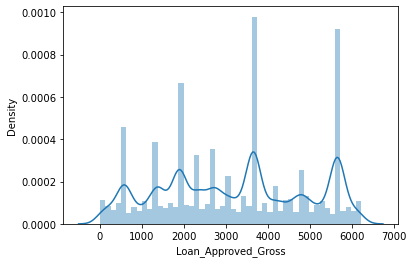

In [65]:
sns.distplot(df_train_1['Loan_Approved_Gross'])

<AxesSubplot:xlabel='ChargedOff_Amount ', ylabel='Density'>

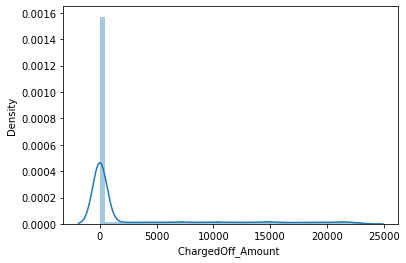

In [66]:
sns.distplot(df_train_1['ChargedOff_Amount '])

<AxesSubplot:xlabel='Primary_Loan_Digit', ylabel='Density'>

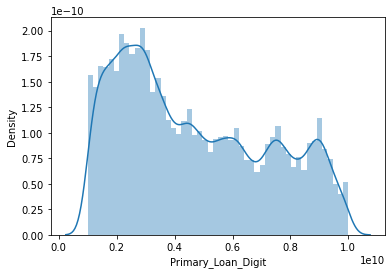

In [67]:
sns.distplot(df_train_1['Primary_Loan_Digit'])

<AxesSubplot:xlabel='Loan_Term', ylabel='Density'>

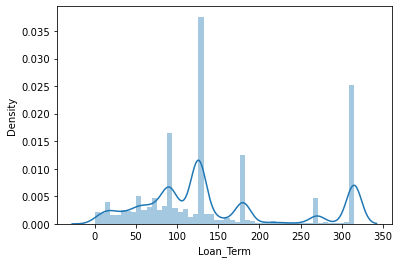

In [68]:
sns.distplot(df_train_1['Loan_Term'])

### Extracting the target column into separate vectors for training set and test set

In [69]:
X = df_train_1.drop('Default', axis = 1)

y = df_train_1.pop('Default')

### Splitting data into training and Validation set

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [71]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (73500, 25)
X_test (31500, 25)
y_train (73500,)
y_test (31500,)


In [130]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)

In [131]:
X_train.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
61274,61274,2714.0,1.0,1.0,0,78,8757,19430,3.0,2,...,1,524298,1089,11777,87.0,1857,5534454009,1,57,9
57688,57688,2817.0,2.0,0.0,0,70,5399,60007,3.0,1,...,3,811121,3651,13390,90.0,6829,7050903009,1,105,6
98229,98229,2867.0,2.0,2.0,1,32,1312,56633,3.0,0,...,2,453998,1627,5894,176.0,2752,6707534002,50140,36,1
96082,96082,2649.0,1.0,3.0,0,35,855,29437,3.0,0,...,3,541620,2342,18787,126.0,3927,2176176006,1,42,9
68228,68228,2280.5,2.0,0.0,2,39,1650,23454,3.0,2,...,1,454210,1415,5069,88.0,3109,3863475002,0,13,6


In [132]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [133]:
annr = MLPClassifier(hidden_layer_sizes=(500),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestClassifier(random_state=1)
dtr = tree.DecisionTreeClassifier(random_state=1)
lr = LinearRegression()
ls = Lasso(alpha=0.01)
rr = Ridge(alpha=0.01)

models=[rr,ls,lr,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr,rr,ls) :
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Ridge Regression','Lasso Regression','Linear Regression','Decision Tree Regressor','Random Forest Regressor','ANN Regressor']))

NameError: name 'LinearRegression' is not defined

In [72]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
minmax = MinMaxScaler()
minmax.fit(X_train)
#minmax.fit(X_test_scaled)

MinMaxScaler()

In [74]:
X_train.head(10)

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
61274,61274,2714.0,1.0,1.0,0,78,8757,19430,3.0,2,...,1,524298,1089,11777,87.0,1857,5534454009,1,57,9
57688,57688,2817.0,2.0,0.0,0,70,5399,60007,3.0,1,...,3,811121,3651,13390,90.0,6829,7050903009,1,105,6
98229,98229,2867.0,2.0,2.0,1,32,1312,56633,3.0,0,...,2,453998,1627,5894,176.0,2752,6707534002,50140,36,1
96082,96082,2649.0,1.0,3.0,0,35,855,29437,3.0,0,...,3,541620,2342,18787,126.0,3927,2176176006,1,42,9
68228,68228,2280.5,2.0,0.0,2,39,1650,23454,3.0,2,...,1,454210,1415,5069,88.0,3109,3863475002,0,13,6
45159,45159,2818.0,1.0,0.0,0,71,1551,26693,3.0,1,...,3,0,1360,4833,90.0,4066,8286213004,1,18,6
32335,32335,2850.0,1.0,2.0,0,79,855,43417,3.0,0,...,2,238140,2342,3061,126.0,155,6287664009,1,104,9
92541,92541,2778.0,1.0,10.0,0,35,2844,13767,3.0,2,...,10,624410,3651,13390,22.0,1029,1577115010,0,123,6
80242,80242,2780.0,2.0,2.0,5,37,9150,86512,3.0,2,...,2,713940,6066,22838,180.0,1845,2909285006,0,58,6
11280,11280,2867.0,1.0,2.0,0,79,5898,15792,3.0,2,...,2,561920,5645,1220,8.0,91,6460634005,1,57,9


In [75]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73500 entries, 61274 to 98539
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         73500 non-null  int64  
 1   Date_Of_Disbursement       73500 non-null  float64
 2   Business                   73500 non-null  float64
 3   Jobs_Reatained             73500 non-null  float64
 4   Jobs_Created               73500 non-null  int64  
 5   Year_Of_Commitment         73500 non-null  int8   
 6   Guaranteed_Approved _Loan  73500 non-null  int16  
 7   Borrower_Name              73500 non-null  int32  
 8   Low_Documentation_Loan     73500 non-null  float64
 9   Demography                 73500 non-null  int8   
 10  State_Of_Bank              73500 non-null  int8   
 11  ChargedOff_Amount          73500 non-null  int16  
 12  Borrower_City              73500 non-null  float64
 13  Borrower_State             73500 non-null 

In [76]:
y_train.value_counts(normalize=True)

0    0.723374
1    0.276626
Name: Default, dtype: float64

In [77]:
y_test.value_counts(1)

0    0.721524
1    0.278476
Name: Default, dtype: float64

### Logistic Regression

In [78]:
lr = LogisticRegression(random_state= 1)
lr.fit(X_train, y_train)

ytrain_predict = lr.predict(X_train)
print('Accuracy of Train data for Logistic Regression: ',accuracy_score(y_train, ytrain_predict))

ytest_predict = lr.predict(X_test)
print('Accuracy of Test data for Logistic Regression:' ,accuracy_score(y_test, ytest_predict))

Accuracy of Train data for Logistic Regression:  0.7233741496598639
Accuracy of Test data for Logistic Regression: 0.7215238095238096


### Applying GridSearchCV for Logistic Regression

In [97]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear','newton-cg'],
      'max_iter':[1000,5000,10000,100000],
      'tol':[0.0001,0.000001]}

In [98]:
model = LogisticRegression(n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)

In [ ]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

In [ ]:
LR = grid_search.best_estimator_

In [ ]:
ytrain_predict = LR.predict(X_train)
display(accuracy_score(y_train, ytrain_predict))
ytest_predict = LR.predict(X_test)
display(accuracy_score(y_test, ytest_predict))

### Naive_bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [80]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [82]:
y_train_predict=NB_model.predict(X_train)
model_score=NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))

print(metrics.classification_report(y_train,y_train_predict))

0.7233741496598639
[[53168     0]
 [20332     0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     53168
           1       0.00      0.00      0.00     20332

    accuracy                           0.72     73500
   macro avg       0.36      0.50      0.42     73500
weighted avg       0.52      0.72      0.61     73500



In [83]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.7215238095238096
[[22728     0]
 [ 8772     0]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     22728
           1       0.00      0.00      0.00      8772

    accuracy                           0.72     31500
   macro avg       0.36      0.50      0.42     31500
weighted avg       0.52      0.72      0.60     31500



### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [87]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:  6.8min finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [88]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9698503401360544
[[52864   304]
 [ 1912 18420]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     53168
           1       0.98      0.91      0.94     20332

    accuracy                           0.97     73500
   macro avg       0.97      0.95      0.96     73500
weighted avg       0.97      0.97      0.97     73500



In [90]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.913306,0.086694
1,0.979268,0.020732
2,0.960944,0.039056
3,0.938505,0.061495
4,0.868311,0.131689


### Bagging

In [91]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
cart=DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10, random_state=1)

Bagging_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=1)

In [94]:
y_train_predict=Bagging_model.predict(X_train)
Bagging_model_score=Bagging_model.score(X_train,y_train)
print(Bagging_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9994285714285714
[[53135    33]
 [    9 20323]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     53168
           1       1.00      1.00      1.00     20332

    accuracy                           1.00     73500
   macro avg       1.00      1.00      1.00     73500
weighted avg       1.00      1.00      1.00     73500



In [95]:
X_validation=pd.read_csv("testing_data.csv")

In [96]:
X_validation.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Count_Employees,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line
0,105000,31-Mar-06,Existing,19,0,2006,Rs.4064000.0,Diversified Display Products o,No,Urban,...,17,326199,Rs.8128000.0,Rs.9403852.16,57,9-Mar-06,1702825000,0,ICICI Bank Ltd.,Yes
1,105001,31-Jan-95,Existing,0,0,1995,Rs.1463040.0,"FOOTE CONSULTING GROUP, INC.",Yes,Undefined,...,2,0,Rs.1625600.0,Rs.1625600.0,90,14-Dec-94,7908833003,1,South Indian Bank Ltd.,No
2,105002,30-Sep-06,Existing,7,5,2006,Rs.812800.0,INTEGRATED COMERCIAL ENTERPRIS,No,Urban,...,2,541611,Rs.1625600.0,Rs.3450336.0,81,25-Aug-06,2361626001,1,IDBI Bank Limited,Yes
3,105003,31-Jul-00,New,2,0,2000,Rs.2032000.0,FIRST IN RESCUE EQUIPMENT,No,Urban,...,2,0,Rs.4064000.0,Rs.6916196.48,18,28-Jun-00,3814664008,1,Aryavart Bank,Yes
4,105004,30-Jun-05,Existing,0,0,2005,Rs.23469600.0,"GLASGOW AUTOMOTIVE, INC.",No,Rural,...,6,441310,Rs.31292800.0,Rs.31292800.0,219,2-May-05,8830244003,1,Paschim Banga Gramin Bank,No


In [98]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in X_validation.columns: 
    if X_validation[feature].dtype == 'object':
        X_validation[feature] = pd.Categorical(X_validation[feature]).codes 

In [116]:
submission_predictions=Bagging_model.predict(X_validation)
print(Bagging_model_score)

0.9994285714285714


In [117]:
submission_predictions =Bagging_model.predict(X_validation)

In [118]:
submission = pd.DataFrame({
        "ID": X_validation["ID"],
        "Default": submission_predictions
    })

In [119]:
submission

,ID,Default
0,105000,1
1,105001,0
2,105002,1
3,105003,0
4,105004,0
...,...,...
44995,149995,1
44996,149996,0
44997,149997,0
44998,149998,0


In [120]:
submission.to_csv(r'C:\\Aishu\\Loan Prediction1.csv', index=False, header=True)

### Boosting

In [108]:
from sklearn.ensemble import AdaBoostClassifier

In [110]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [111]:
y_train_predict=ADB_model.predict(X_train)
ADB_model_score=ADB_model.score(X_train,y_train)
print(ADB_model_score)

print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9941360544217687
[[52821   347]
 [   84 20248]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     53168
           1       0.98      1.00      0.99     20332

    accuracy                           0.99     73500
   macro avg       0.99      0.99      0.99     73500
weighted avg       0.99      0.99      0.99     73500



In [121]:
submission_prediction_2=ADB_model.predict(X_validation)

In [122]:
submission_2= pd.DataFrame({
        "ID": X_validation["ID"],
        "Default": submission_predictions
    })

In [123]:
submission_2.to_csv(r'C:\\Aishu\\Loan Prediction2.csv', index=False, header=True)

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [126]:
y_train_predict = gbc_model.predict(X_train)
gbc_model_score = gbc_model.score(X_train, y_train)
print(gbc_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9948707482993198
[[52846   322]
 [   55 20277]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     53168
           1       0.98      1.00      0.99     20332

    accuracy                           0.99     73500
   macro avg       0.99      1.00      0.99     73500
weighted avg       0.99      0.99      0.99     73500



In [127]:
submission_prediction_3=ADB_model.predict(X_validation)

In [128]:
submission_3= pd.DataFrame({
        "ID": X_validation["ID"],
        "Default": submission_predictions
    })

In [129]:
submission_3.to_csv(r'C:\Aishu\Loan_Prediction-3.csv', index=False, header=True)